# USA 

## 1) Data Cleaning

#### 1- importation des bibliothéques pour la manipulation et la visualisation des données


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2- Importation de la base Bank of America

In [7]:

USA = pd.read_csv("Bank_of_America_data.csv")
# Affichage de premier 5 client
USA.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [8]:
#Affichage de dimension du Dataframe
USA.shape

(5960, 13)

#### Data Cleaning
#### 4- Suppression des données manquants 

In [9]:
#Affichage de nombre manquants pour chaque  colonne
USA.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
#Affichage des données propres aprés la suppression des données manquants
data_propre = USA.dropna()
# Affichage de la dimension
data_propre.shape


(3364, 13)

In [11]:
#Vérification de la suppression des données manquants
data_propre.isna().sum();
data_propre.head(2)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894


## feature engineering 

### 4) encodage des variables qualitatives 

#### a) Encodage de variable "Reason"

In [12]:
#Affichage des modalités de variable "Reason"
data_propre["REASON"].unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [13]:
#Affichage le nombre des modalités de variable "Reason"
data_propre["REASON"].nunique()

2

In [14]:
#Affichage des modalités de variable "JOB"
data_propre["JOB"].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Sales', 'Self'], dtype=object)

In [15]:
#Affichage le nombre des modalités de variable "JOB"
data_propre["JOB"].nunique()

6

In [16]:
## On utilise Labelencoder()pour l'encodage de variable binaire
from sklearn.preprocessing import LabelEncoder
# Appel de la fonction Labelencoder
ReasonQuanti = LabelEncoder()
#Transformation des variables qualitatives en des variables quantitatives
ReasonQuanti.fit(data_propre["REASON"].values)
matReasonQuanti = ReasonQuanti.transform(data_propre["REASON"].values)
matReasonQuanti
# Affichage des données dans un Dataframe
dfResonQuanti = pd.DataFrame(matReasonQuanti,index= data_propre.index,columns=["REASON"])

#### On fait identifier la valeur de chaque modalités de variable "Reason"
#### HomeImp -> 1
#### DebtCon -> 0

In [17]:
#Affichage des données aprés l'encodage
dfResonQuanti.head()

,REASON
5,1
7,1
19,1
25,1
26,1


## 2- Encodage de variable JOB

In [18]:
## On utilise OneHotEncoder pour encoder les variables à modalités multiples
from sklearn.preprocessing import OneHotEncoder 
# Appel de la fonction OnehotEncoder
oneHotEncoder = OneHotEncoder()
#Transformation des variables qualitatives en des variables quantitatives
matJobQuanti =oneHotEncoder.fit_transform(data_propre["JOB"].values.reshape(-1,1))
matJobQuanti
matJobQuanti.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [19]:
# Affichage les modalités de variable "JOB"
oneHotEncoder.categories_

[array(['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self'], dtype=object)]

In [20]:
# Mettre les donnés dans un dataframe
pd.DataFrame(matJobQuanti.toarray()).head(2)

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# Concatination de variable Job et les valeurs de l'encodage pour identifier la valeaur de chaque modalité
pd.concat( [pd.DataFrame(matJobQuanti.toarray(),index=data_propre.index) ,data_propre["JOB"]],axis=1).head(3)

,0,1,2,3,4,5,JOB
5,0.0,0.0,1.0,0.0,0.0,0.0,Other
7,0.0,0.0,1.0,0.0,0.0,0.0,Other
19,0.0,1.0,0.0,0.0,0.0,0.0,Office


In [22]:
#Affichage des modalités dans un dataframe
data_propre["JOB"].unique()
matJobQuanti=matJobQuanti.toarray()
dfJobQuanti = pd.DataFrame(matJobQuanti,
                   columns=["Mgr","Office","Other","ProfExe","Sales","Self"],
                  index=data_propre.index)
dfJobQuanti.head(3)

,Mgr,Office,Other,ProfExe,Sales,Self
5,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
# Suppression de la colonne "Mgr" pour reduire la dimension
dfJobQuanti.drop(columns=["Mgr"],inplace=True)
dfJobQuanti.head(3)

,Office,Other,ProfExe,Sales,Self
5,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
19,1.0,0.0,0.0,0.0,0.0


In [24]:
# effacer les colonnes qualitatives
data_propre.drop(columns=["REASON","JOB"],inplace=True)
data_propre.head(3)

C:\Users\marie\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503


In [25]:
#Concatination des variables encodés dans le dataframe
data_final_USA = pd.concat([data_propre,dfResonQuanti,dfJobQuanti],axis=1)
data_final_USA.head(3)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Office,Other,ProfExe,Sales,Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0.0,1.0,0.0,0.0,0.0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1,0.0,1.0,0.0,0.0,0.0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,1,1.0,0.0,0.0,0.0,0.0


## Analyse descriptive des données

In [26]:
#Réaliser une analyse descriptive
data_propre.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000
mean,0.089180,19154.399524,76249.621581,107501.385850,9.110285,0.146849,0.278835,180.993684,1.037455,22.11415,34.135451
std,0.285045,10875.418447,45095.372690,54728.240086,7.596541,0.579524,0.809631,82.769271,1.549777,9.38733,7.951413
min,0.000000,1700.000000,5076.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.00000,0.838118
25%,0.000000,12000.000000,49351.250000,71235.000000,3.000000,0.000000,0.000000,118.687903,0.000000,16.00000,29.362596
50%,0.000000,17000.000000,67278.500000,94453.500000,7.000000,0.000000,0.000000,176.742048,1.000000,21.00000,35.129484
75%,0.000000,23825.000000,92986.750000,122339.250000,13.000000,0.000000,0.000000,230.402191,2.000000,27.00000,39.087624
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,64.00000,144.189001


In [27]:
#Tester la variation entre la moyenne et la médiane
abs(   (data_propre.mean() - data_propre.median()) / (data_propre.mean()) )*100

BAD        100.000000
LOAN        11.247544
MORTDUE     11.765464
VALUE       12.137412
YOJ         23.163768
DEROG      100.000000
DELINQ     100.000000
CLAGE        2.349052
NINQ         3.610315
CLNO         5.038176
DEBTINC      2.912023
dtype: float64

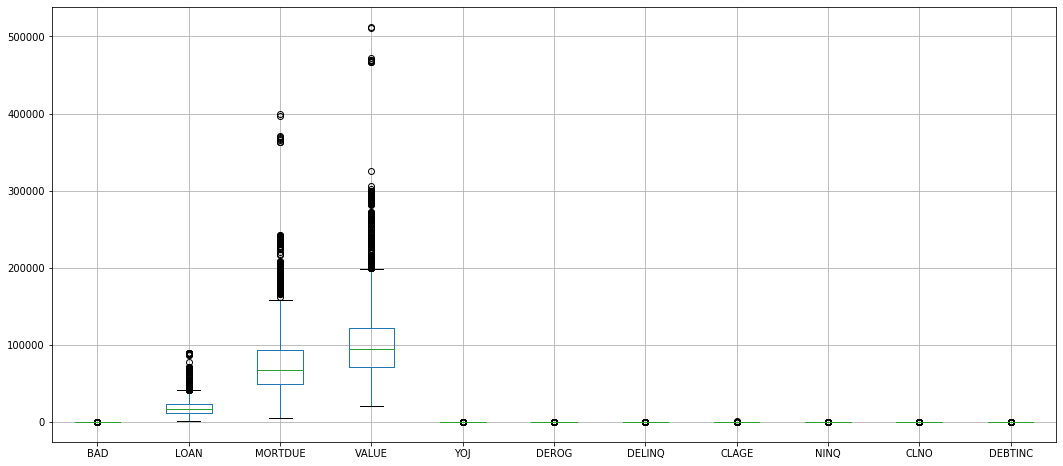

In [28]:
# Visualiser les points abérants
data_propre.boxplot(figsize=(18,8));

In [29]:
# Affichage de la corrélation entre les variables

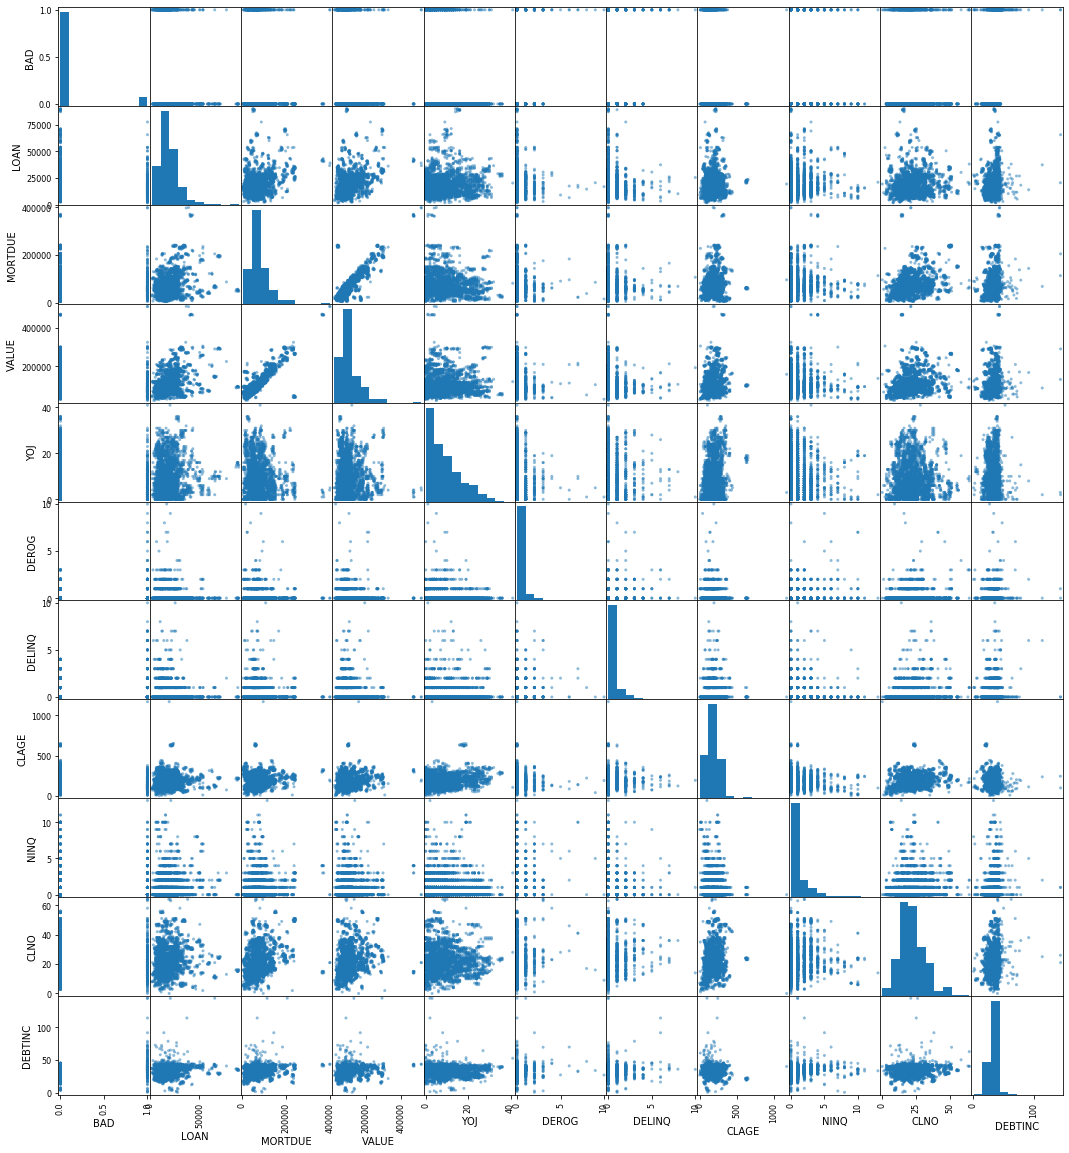

In [30]:
pd.plotting.scatter_matrix(data_propre , figsize=(18,20));

In [31]:
# limiter 3 chiffres aprés la vigule
pd.options.display.float_format = '{:,.3f}'.format

In [32]:
# Affichage de la corrélation entre les variables
data_propre.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000,-0.031,-0.017,-0.026,-0.064,0.254,0.275,-0.114,0.126,0.008,0.217
LOAN,-0.031,1.000,0.273,0.379,0.076,-0.024,-0.067,0.066,0.051,0.076,0.157
MORTDUE,-0.017,0.273,1.000,0.865,-0.103,-0.043,-0.036,0.138,0.036,0.321,0.185
VALUE,-0.026,0.379,0.865,1.000,-0.021,-0.046,-0.068,0.198,-0.007,0.215,0.131
YOJ,-0.064,0.076,-0.103,-0.021,1.000,-0.056,0.022,0.231,-0.046,-0.001,-0.052
DEROG,0.254,-0.024,-0.043,-0.046,-0.056,1.000,0.148,-0.054,0.182,0.066,0.035
DELINQ,0.275,-0.067,-0.036,-0.068,0.022,0.148,1.000,0.012,0.004,0.123,0.038
CLAGE,-0.114,0.066,0.138,0.198,0.231,-0.054,0.012,1.000,-0.089,0.202,-0.051
NINQ,0.126,0.051,0.036,-0.007,-0.046,0.182,0.004,-0.089,1.000,0.078,0.157
CLNO,0.008,0.076,0.321,0.215,-0.001,0.066,0.123,0.202,0.078,1.000,0.144


<function matplotlib.pyplot.show(*args, **kw)>

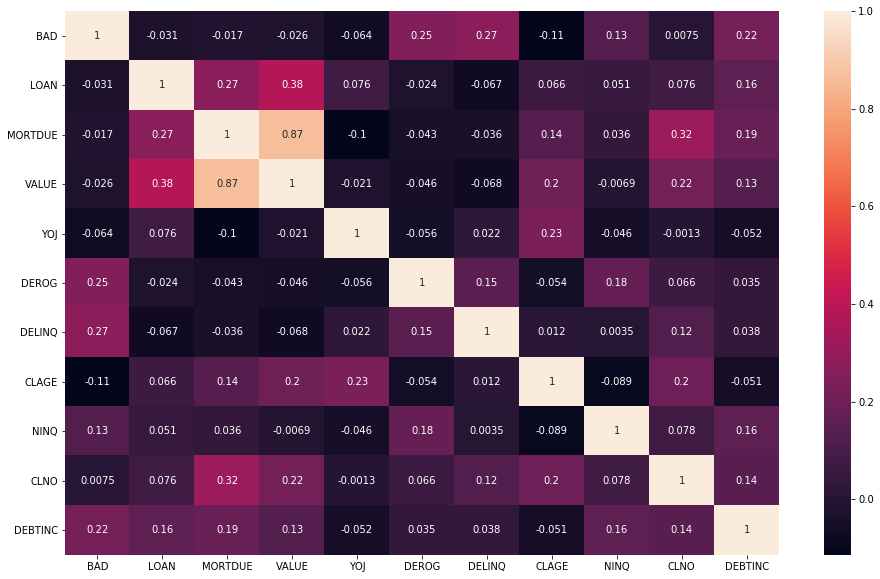

In [33]:
# Visualiser la corrélation enutilisant heatmap sans les variables encodées
plt.figure(figsize=(16,10))
sns.heatmap(data_propre.corr() , annot=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

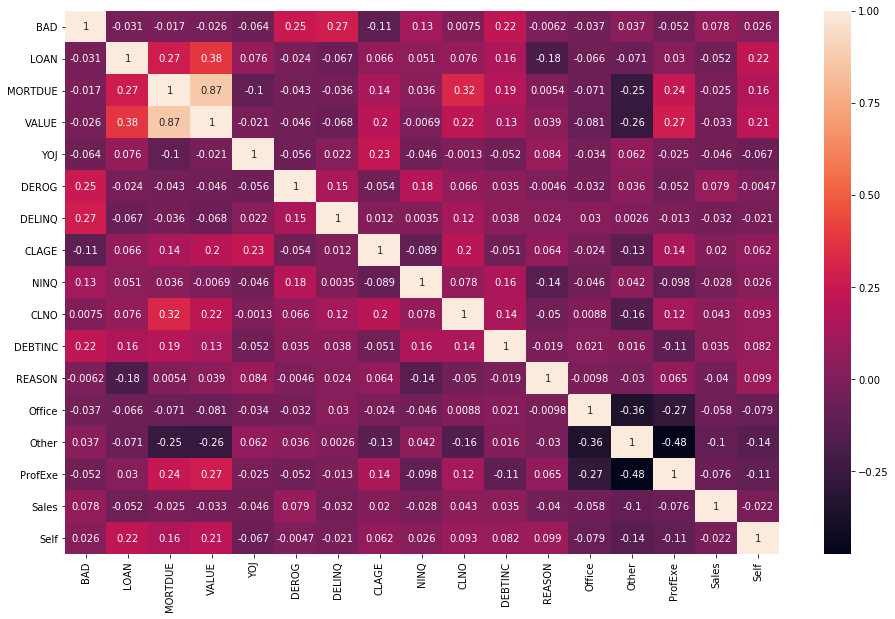

In [34]:
# Visualiser la corrélation en utilisant heatmap avec les variables encodés
plt.figure(figsize=(16,10))
sns.heatmap(data_final_USA.corr() , annot=True)
plt.show

# data Seslection 

In [35]:
#Importation des classe de Select KBest et chi2 pour appliquer Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
# Découpage des données en variables explicatives et variables expliquées
X = data_final_USA.iloc[:,1:]  
y = data_final_USA.iloc[:,:1]    

In [37]:
X.head(2)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Office,Other,ProfExe,Sales,Self
5,1700,"30,548.000","40,320.000",9.000,0.000,0.000,101.466,1.000,8.000,37.114,1,0.000,1.000,0.000,0.000,0.000
7,1800,"28,502.000","43,034.000",11.000,0.000,0.000,88.766,0.000,8.000,36.885,1,0.000,1.000,0.000,0.000,0.000


In [38]:
y.head(2)

,BAD
5,1
7,1


In [39]:
# Affichage de la dimention de variables explicatives
X.shape

(3364, 16)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### 1) Méthode de KBest 

In [40]:
# Séparer les données pour l'apprentissage et le test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# Appliquer une fonction qui permet de la décomposition des données
# en train et test avec une division de 0.2
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
# Suppression de variable cible "BAD"
feature_cols = data_final_USA.columns.drop('BAD')
train, valid, _ = get_data_splits(data_final_USA)
# Appliquer la méthode "SelectKBest" en gardant que les 9 colonnes qui expliquent l'information le mieux
selector = SelectKBest(f_classif, k=9)

X_new = selector.fit_transform(train[feature_cols], train['BAD'])


In [43]:
# Afficher dans un dataframe les meilleurs colonnes  , les autres colonnes ont des valeurs de 0
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head(3)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Office,Other,ProfExe,Sales,Self
5,0.000,0.000,"40,320.000",9.000,0.000,0.000,101.466,1.000,0.000,37.114,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.000,"43,034.000",11.000,0.000,0.000,88.766,0.000,0.000,36.885,0.000,0.000,0.000,0.000,0.000,0.000
19,0.000,0.000,"120,953.000",2.000,0.000,0.000,90.993,0.000,0.000,31.589,0.000,0.000,0.000,0.000,0.000,0.000


In [44]:
#Garder que les colonnes qui ont des valeurs non nuls, on obtient alors que les meilleurs colonnes 
selected_columns = selected_features.columns[selected_features.var() != 0]


train[selected_columns].head(2)

,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,DEBTINC,ProfExe,Sales
5,"40,320.000",9.000,0.000,0.000,101.466,1.000,37.114,0.000,0.000
7,"43,034.000",11.000,0.000,0.000,88.766,0.000,36.885,0.000,0.000


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Méthode de L1regression

In [45]:
# Importer la classe "warnings" qui permet d'ignorer les erreurs de gravité "warnings"
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# On fait la division des données
train, valid, _ = get_data_splits(data_final_USA)

X1, y1 = train[train.columns.drop("BAD")], train['BAD']

# On choisit lasso-régression pour filtrer les colonnes
logistic = LogisticRegression(C=1, penalty="l2", random_state=7).fit(X1, y1)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X1)


In [46]:
# Affichage des colonnes séléctionnés dans un dataframe
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X1.index,
                                 columns=X1.columns)
#Suppression des donneés qui ont des valeurs nuls
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

Index(['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'DEBTINC'], dtype='object')

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### La méthode de Kbest en utilisant la métrique de chi2

In [47]:
#Diviser les données pour l'aprentissage et le test afin d'avoir une meilleur résultat
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#appliquer SelectKBest class pour obtenir les 10 premieres features 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
#Ajouter deux dataframe pour les noms de features et le score de KBest
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concatiner les deux dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['colonnes ','Score']  

In [48]:
#Trier les Features selon le score obtenues
featureScores.nlargest(10,'Score')

,colonnes,Score
2,VALUE,"26,521.480"
0,LOAN,"4,865.216"
6,CLAGE,"1,361.699"
5,DELINQ,438.856
4,DEROG,387.686
1,MORTDUE,385.038
9,DEBTINC,220.888
7,NINQ,101.453
3,YOJ,53.104
14,Sales,19.607


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### la méthode Feature Importance

In [49]:
# Importer la classe ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [50]:
#Faire l'apprentissage des données en utilisant le model ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [51]:
#Afficher "feature_importances" pour chaque colonne
print(model.feature_importances_) 

[0.07537201 0.0926077  0.09574609 0.06848987 0.06244111 0.09022119
 0.08971685 0.07271814 0.09494233 0.16774546 0.02678862 0.01135862
 0.01596306 0.01283021 0.01528118 0.00777752]


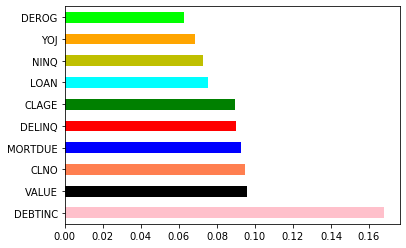

In [52]:
#Visualiser "feature_importance" dans un graphe
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',color=['pink','black', 'coral', 'blue','red', 'green', 'cyan','y','orange','lime'])
plt.show()

#### remise a l'echellle avec standarscaler (TCL)  en utilisant valeur moyenne et écart-type

In [53]:
#data_final_USA.drop(columns=['REASON','Office'',Other','ProfExe','Sales','Self','DEBTINC']).head(2)
k = data_final_USA.iloc[:,:11]
k.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,"30,548.000","40,320.000",9.000,0.000,0.000,101.466,1.000,8.000,37.114
7,1,1800,"28,502.000","43,034.000",11.000,0.000,0.000,88.766,0.000,8.000,36.885


In [54]:
# Importer la classe StandardScaler pour l'échantionnage
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Appliquer la méthode pour le dataframe data_final_USA
ss.fit(k.values)
matriceTCL = ss.transform(k.values)

In [55]:
#Afficher les données aprés remise a l'echellle avec standarscaler
dataTCL =pd.DataFrame(matriceTCL , columns=k.columns)
dataTCL.head(2)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,3.196,-1.605,-1.014,-1.228,-0.015,-0.253,-0.344,-0.961,-0.024,-1.504,0.375
1,3.196,-1.596,-1.059,-1.178,0.249,-0.253,-0.344,-1.114,-0.670,-1.504,0.346


# *****************************************************************************************************************************************************************************************************************************************************************************************************

#### remise a l'echellle avec standarscaler (TCL)  en utilisant valeur moyenne et écart-type

In [56]:
# Importer la classe StandardScaler pour l'échantionnage
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Appliquer la méthode pour le dataframe data_final_USA
ss.fit(data_final_USA.values)
matriceTCL2 = ss.transform(data_final_USA.values)

In [57]:
#Afficher les données aprés remise a l'echellle avec standarscaler
dataTCL2 =pd.DataFrame(matriceTCL2 , columns=data_final_USA.columns)
dataTCL2.head(2)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Office,Other,ProfExe,Sales,Self
0,3.196,-1.605,-1.014,-1.228,-0.015,-0.253,-0.344,-0.961,-0.024,-1.504,0.375,1.543,-0.455,1.271,-0.604,-0.127,-0.174
1,3.196,-1.596,-1.059,-1.178,0.249,-0.253,-0.344,-1.114,-0.670,-1.504,0.346,1.543,-0.455,1.271,-0.604,-0.127,-0.174


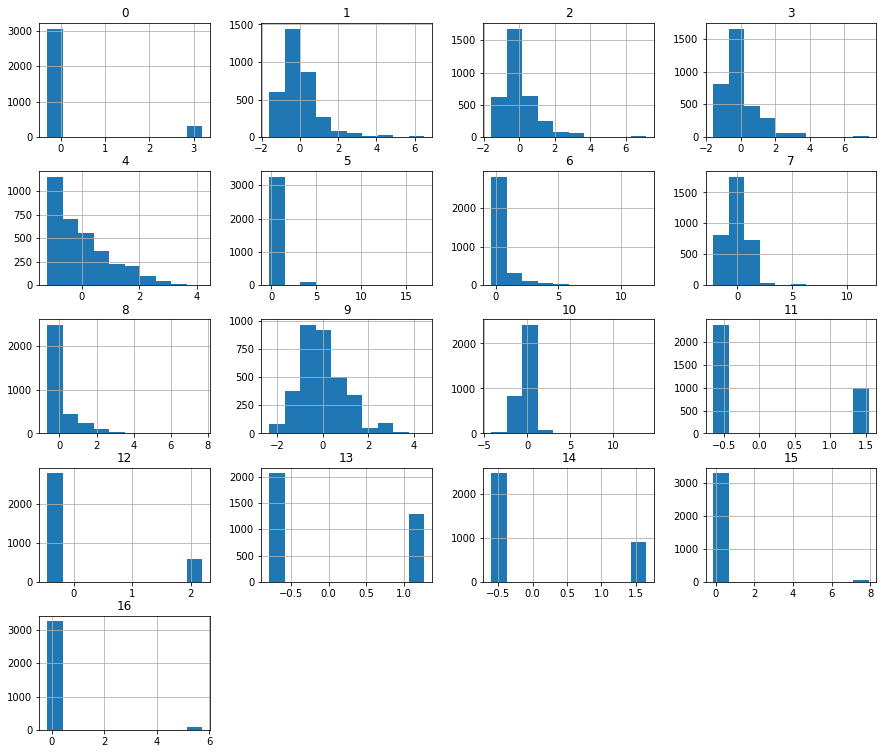

In [58]:
#Afficher la forme des données de chaque feature en utilisant "hist"
pd.DataFrame(matriceTCL2).hist(figsize=(15,13));

### Méthode de PCA

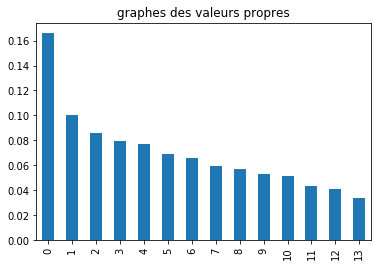

array([0.16610255, 0.10035604, 0.08580297, 0.07919121, 0.07678271,
       0.06937258, 0.06582428, 0.05921586, 0.05659928, 0.05282155,
       0.0511677 , 0.04356029, 0.0408454 , 0.03397606])

In [59]:
# Importer la classe de PCA
from sklearn.decomposition import PCA
#initialiser la méthode PCA
pca = PCA(0.95)

# fit and transform les données explicatives seulement
datapca = pca.fit(dataTCL2.iloc[:,1:])
# Afficher les pourcentages de variance expliquée de chaque feature
val = pd.Series(datapca.explained_variance_ratio_)
val.plot(kind='bar', title="graphes des valeurs propres")
plt.show()
#  Création d'un dataframe qui contient les valeurs de chaque composants 
# Initiation pour afficher la cercle de corrélation
coef = np.transpose(pca.components_)
cols = ['PC-'+str(x) for x in range(len(val))]
pc_infos = pd.DataFrame(coef, columns=cols, index=dataTCL2.iloc[:,1:].columns)
pca.n_components_
datapca.explained_variance_ratio_

Text(0.5, 1.0, 'Circle of Correlations')

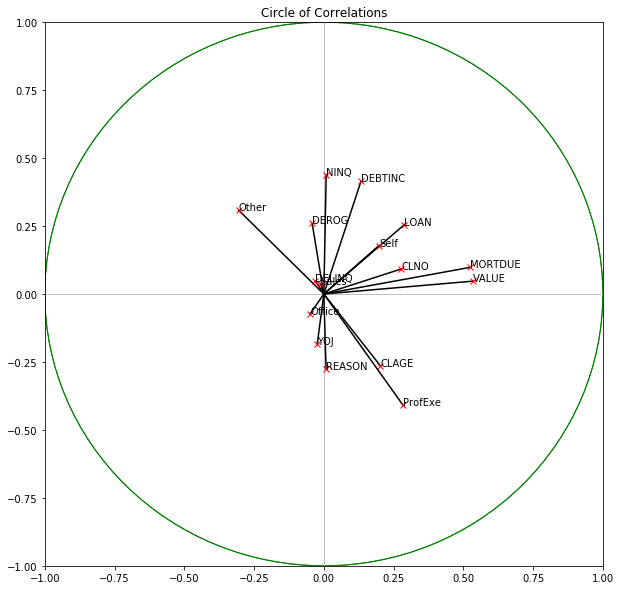

In [60]:
# Affichage de la cercle de corrélation
# Réalisation d'un graphe qui contient un cercle
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["PC-0"])):
    x = pc_infos["PC-0"][idx]
    y = pc_infos["PC-1"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")

In [61]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
n_comp = 17
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [62]:
# choix du nombre de composantes à calculer
n_comp = 17

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
#theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
Xx = data_final_USA.values
features = data_final_USA.columns

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(Xx)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

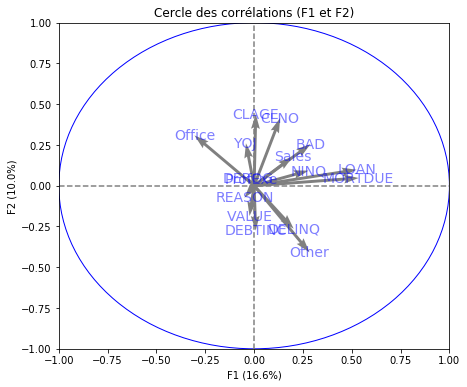

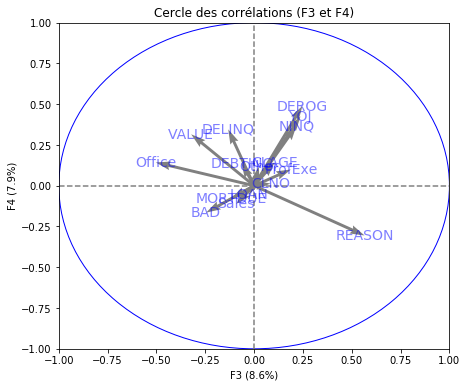

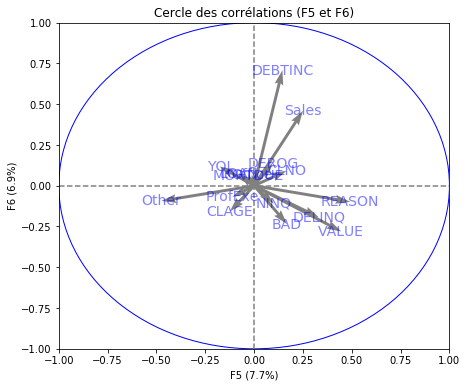

In [63]:
# Cercle des corrélations
pcs = datapca.components_
display_circles(pcs, n_comp, datapca, [(0,1),(2,3),(4,5)], labels = np.array(features))

plt.show()

#### Autre méthode pour afficher la cercle de corrélation

In [64]:
# Importer la classe "plot_pca_correlation_graph"
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np

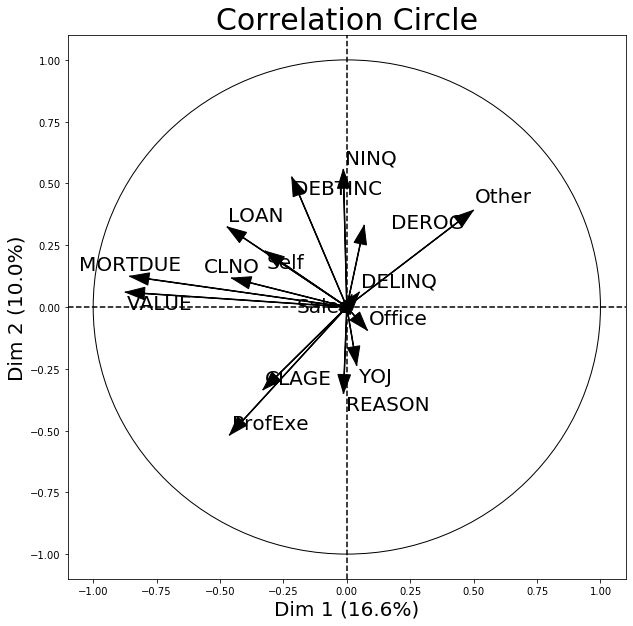

In [65]:
#Affichage de la cercle de corrélation
figure, correlation_matrix = plot_pca_correlation_graph(dataTCL2.iloc[:,1:].values, 
                                                        dataTCL2.iloc[:,1:].columns,
                                                        figure_axis_size=10)

##### Aprés la visualisation de la  corrélation entre les Features et l'étape Feature Selection, nous avons conclus que les features qui expriment bien la variable cible sont :
####  'LOAN','VALUE','DEROG','DELINQ','DEBTINC'

## Modeling

In [66]:
#Préparer la variable cible pour la phase de model
k=data_final_USA['BAD'].values
data_bad=pd.DataFrame(k,columns=['BAD'])
data_bad.head(2)

,BAD
0,1
1,1


In [67]:
#Créer un nouveau Dataframe qui contient les features séléctionnés pour l'étape de Model
clos=['LOAN','VALUE','DEROG','DELINQ','DEBTINC'];
data_model=pd.DataFrame(dataTCL,index=dataTCL.index,columns=dataTCL[clos].columns)

In [68]:
data_model.head(2)

,LOAN,VALUE,DEROG,DELINQ,DEBTINC
0,-1.605,-1.228,-0.253,-0.344,0.375
1,-1.596,-1.178,-0.253,-0.344,0.346


In [69]:
data_model.shape

(3364, 5)

In [70]:
#Diviser les données pour l'apprentissage et le test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_model.values,data_bad.values.ravel() , test_size = 0.2,random_state=2)

### KNN

Text(0, 0.5, 'Erreur')

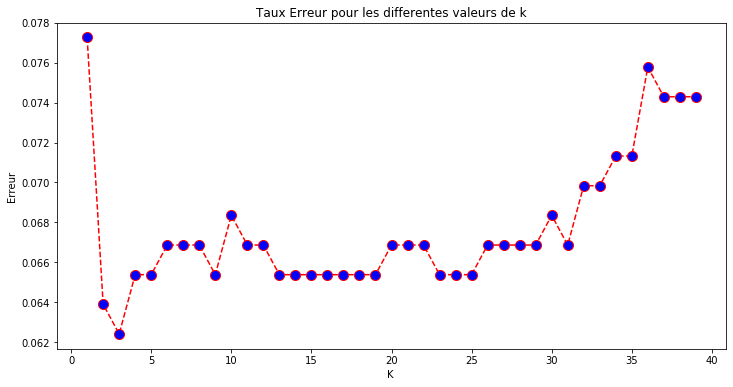

In [71]:
#Importer la classe "KNeighborsClassifier"
from sklearn.neighbors import KNeighborsClassifier
# Importer class "warnings"  pour ignorer les erreurs de type erreurs
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
error = []
# faire une boucle pour connaitre la meilleur valeur de K
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train1, y_train1)
    pred_i = knn_model.predict(X_test1)
    error.append(np.mean(pred_i != y_test1))
#Afficher l'erreur en fonction de k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [72]:
from sklearn.neighbors import KNeighborsClassifier
# Appliquer la meilleur valeur de k=2
knn1 = KNeighborsClassifier(2)
# Faire l'étape d'apprentissage  
knn_model1 = knn.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_knn1 =knn_model1.predict(X_test1)
# Afficher l'accuracy de prédiction
knn_score=knn_model1.score(X_test1,y_test1)
knn_score

0.9257057949479941

In [73]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_knn1))

0.9257057949479941


In [74]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_knn1))

[[614   0]
 [ 50   9]]


In [75]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_knn1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       614
           1       1.00      0.15      0.26        59

    accuracy                           0.93       673
   macro avg       0.96      0.58      0.61       673
weighted avg       0.93      0.93      0.90       673



## 1- DecisionTreeClassifier

In [76]:
#Importer la classe "DecisionTreeClassifier"
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# Faire l'étape d'apprentissage  
dtc_model = DecisionTreeClassifier().fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_dtc = dtc_model.predict(X_test1)
# Afficher l'accuracy de prédiction
dtc_score=dtc_model.score(X_test1,y_test1)
dtc_score

0.9167904903417533

In [77]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_dtc))

0.9167904903417533


In [78]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_dtc))

[[591  23]
 [ 33  26]]


In [79]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       614
           1       0.53      0.44      0.48        59

    accuracy                           0.92       673
   macro avg       0.74      0.70      0.72       673
weighted avg       0.91      0.92      0.91       673



## 2- RandomForestClassifier


In [80]:
#Importer la classe "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=30,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
# Faire l'étape d'apprentissage  
rfc_model = rfc.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_rfc = rfc_model.predict(X_test1)
# Afficher l'accuracy de prédiction
rfc_score=rfc_model.score(X_test1,y_test1)
rfc_score

0.9420505200594353

In [81]:
# Importer la classe accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_pred_rfc))

0.9420505200594353


In [82]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_rfc))

[[613   1]
 [ 38  21]]


In [83]:
#Afficher "classification_report"
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       614
           1       0.95      0.36      0.52        59

    accuracy                           0.94       673
   macro avg       0.95      0.68      0.74       673
weighted avg       0.94      0.94      0.93       673



## Logistic regression

In [84]:
#Importer la classe "LogisticRegression"
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Faire l'étape d'apprentissage  
lr_model = lr.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_lr = lr_model.predict(X_test1)
# Afficher l'accuracy de prédiction
lr_score=lr_model.score(X_test1,y_test1)
lr_score

0.9346210995542348

In [85]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_lr))

[[613   1]
 [ 43  16]]


In [86]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       614
           1       0.94      0.27      0.42        59

    accuracy                           0.93       673
   macro avg       0.94      0.63      0.69       673
weighted avg       0.94      0.93      0.92       673



## Naive Bayes

In [87]:
#Importer la classe "GaussianNB"
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB()
# Faire l'étape d'apprentissage  
model_naive=model_NB.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_nb =model_naive.predict(X_test1)
# Afficher l'accuracy de prédiction
nb_score=model_naive.score(X_test1,y_test1)
nb_score

0.9153046062407132

In [88]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_nb))

[[593  21]
 [ 36  23]]


In [89]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       614
           1       0.52      0.39      0.45        59

    accuracy                           0.92       673
   macro avg       0.73      0.68      0.70       673
weighted avg       0.91      0.92      0.91       673



## Support Vector Machine

In [90]:
#Importer la classe "SVC"
from sklearn.svm import SVC
model_svm= SVC(gamma='auto',C= 20, kernel='rbf')
# Faire l'étape d'apprentissage 
model_svm1=model_svm.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_svm = model_svm.predict(X_test1)
# Afficher l'accuracy de prédiction
svm_score=model_svm1.score(X_test1,y_test1)
svm_score

0.9450222882615156

In [91]:
#Appliquer la matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_pred_svm))

[[612   2]
 [ 35  24]]


In [92]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       614
           1       0.92      0.41      0.56        59

    accuracy                           0.95       673
   macro avg       0.93      0.70      0.77       673
weighted avg       0.94      0.95      0.94       673



## XGBOOST

In [93]:
#Importer la classe "XGBClassifier"
from xgboost import XGBClassifier
model_xgboost= XGBClassifier()
# Faire l'étape d'apprentissage 
model_xgboost.fit(X_train1,y_train1)
# réaliser la prédiction de X_test1
y_pred_xgb = model_xgboost.predict(X_test1)
# Afficher l'accuracy de prédiction
model_xgboost.score(X_test1,y_test1)

0.9420505200594353

In [94]:
xgb_score=model_xgboost.score(X_test1,y_test1)
xgb_score

0.9420505200594353

In [95]:
#Appliquer la matrice de confusion
print(confusion_matrix(y_test1, y_pred_xgb))

[[613   1]
 [ 38  21]]


In [96]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       614
           1       0.95      0.36      0.52        59

    accuracy                           0.94       673
   macro avg       0.95      0.68      0.74       673
weighted avg       0.94      0.94      0.93       673



## ADABOOST

In [97]:
#Importer la classe "AdaBoostClassifier"
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=500, learning_rate=0.8)
# Faire l'étape d'apprentissage 
model_ada.fit(X_train1, y_train1)
# réaliser la prédiction de X_test1
y_pred_ada = model_ada.predict(X_test1)
model_ada.score(X_test1,y_test1)
# Afficher l'accuracy de prédiction
ada_score=model_ada.score(X_test1,y_test1)
ada_score

0.9435364041604755

In [98]:
print(confusion_matrix(y_test1, y_pred_ada))

[[612   2]
 [ 36  23]]


In [99]:
#Afficher "classification_report"
print(classification_report(y_test1, y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       614
           1       0.92      0.39      0.55        59

    accuracy                           0.94       673
   macro avg       0.93      0.69      0.76       673
weighted avg       0.94      0.94      0.93       673



### Courbe ROC de différents modéle

In [100]:
#Importer les méthodes "roc_curve, auc"
%matplotlib inline

from sklearn.metrics import roc_curve, auc

In [101]:
# Création d'un tuple qui contient false positive rate, trus positive rate 
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_pred_dtc) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_pred_rfc) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test1, y_pred_knn1)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test1, y_pred_svm)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test1, y_pred_xgb)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test1, y_pred_ada)
roc_auc6= auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test1, y_pred_lr)
roc_auc7= auc(fpr7, tpr7)
fpr8, tpr8, threshold8 = roc_curve(y_test1, y_pred_nb)
roc_auc8= auc(fpr8, tpr8)

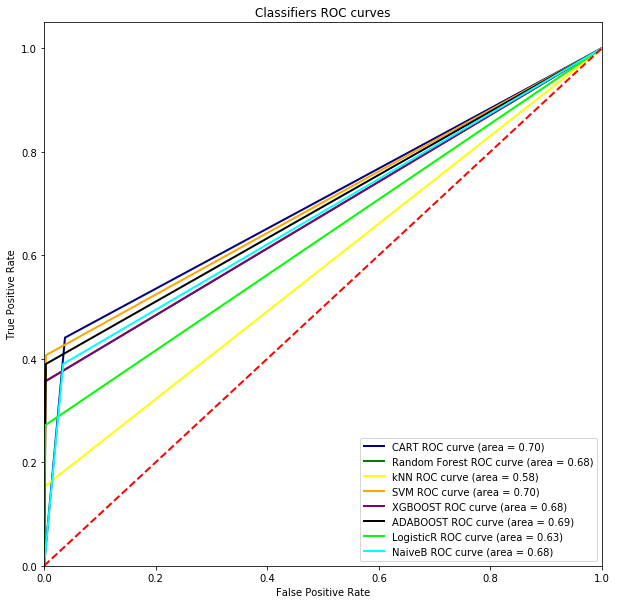

In [102]:
plt.figure(figsize=(10,10)) 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='orange', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw=2, label='XGBOOST ROC curve (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='ADABOOST ROC curve (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='lime', lw=2, label='LogisticR ROC curve (area = %0.2f)'% roc_auc7)
plt.plot(fpr8, tpr8, color='cyan', lw=2, label='NaiveB ROC curve (area = %0.2f)'% roc_auc8)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [103]:
df2 = np.array([1800,43034,0,0,36.88]).reshape(1,5)
model_ada.predict(df2)

array([1], dtype=int64)

In [104]:
model_xgboost.predict(df2)

array([1], dtype=int64)

In [105]:
knn_model1.predict(df2)

array([0], dtype=int64)

In [106]:
model_svm1.predict(df2)

array([1], dtype=int64)

In [107]:
dtc_model.predict(df2)

array([1], dtype=int64)

In [108]:
lr_model.predict(df2)

array([0], dtype=int64)

In [109]:
rfc_model.predict(df2)

array([1], dtype=int64)

In [135]:
# Création de fichier pickle  contient les models traités au-dessus
import pickle
with open('usa_finalv2.pkl','wb') as file:
    pickle.dump([knn_model1,dtc_model,rfc_model,lr_model,model_naive,model_svm1,model_xgboost,model_ada],file)

In [111]:
# Création de fichier pickle contient false positive rate, true positive rate et roc_auc
import pickle
with open('usa_final_rocv2.pkl','wb') as file:
    pickle.dump([fpr1, tpr1,roc_auc1,fpr2, tpr2,roc_auc2,fpr3, tpr3,roc_auc3,fpr4, tpr4,roc_auc4,fpr5, tpr5,roc_auc5,fpr6, tpr6,roc_auc6,fpr7, tpr7,roc_auc7,fpr8, tpr8,roc_auc8],file)

In [134]:
# Création de fichier pickle contient le score de chaque modéle traité
import pickle
with open('usa_final_scoreV2.pkl','wb') as file:
    pickle.dump([knn_score,dtc_score,rfc_score,lr_score,nb_score,svm_score,xgb_score,ada_score],file)

In [136]:
#ouvrir un fichier pickle
with open('usa_finalv2.pkl','rb') as f:
    ma= pickle.load(f)
ma[0]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

In [137]:
#Tester la prédiction d'un nouveau donnée
df = np.array([44,44,1,1,0]).reshape(1,5)
ma[0].predict(df)

array([0], dtype=int64)

## Hyper parameter Tuning

In [115]:
# Importer la classe model_selection pour utilisé la méthode de "GridSearchCV"
from sklearn.model_selection import GridSearchCV
# utilise la méthode "GridSearchCV" pour choisir les meilleurs Hyperparametres pour le modéle SVM 
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','poly']
}, cv=5, return_train_score=False)
#Faire l'apprentissage de cette méthode 
clf.fit(X_train1, y_train1)
#afficher les résultats dans un dataframe
clf.cv_results_
hyper = pd.DataFrame(clf.cv_results_)
hyper

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045,0.014,0.006,0.002,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.926,0.929,0.939,0.929,0.941,0.933,0.006,3
1,0.122,0.040,0.004,0.000,1,linear,"{'C': 1, 'kernel': 'linear'}",0.911,0.911,0.911,0.911,0.911,0.911,0.000,7
2,0.266,0.078,0.004,0.001,1,poly,"{'C': 1, 'kernel': 'poly'}",0.920,0.935,0.933,0.931,0.939,0.932,0.006,6
3,0.107,0.006,0.008,0.000,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.933,0.942,0.948,0.937,0.944,0.941,0.005,2
4,0.599,0.192,0.003,0.001,10,linear,"{'C': 10, 'kernel': 'linear'}",0.911,0.911,0.911,0.911,0.911,0.911,0.000,7
5,1.069,0.289,0.003,0.001,10,poly,"{'C': 10, 'kernel': 'poly'}",0.920,0.935,0.937,0.929,0.939,0.932,0.007,4
6,0.089,0.009,0.005,0.001,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.935,0.944,0.950,0.937,0.946,0.942,0.006,1
7,0.950,0.293,0.003,0.001,20,linear,"{'C': 20, 'kernel': 'linear'}",0.911,0.911,0.911,0.911,0.911,0.911,0.000,7
8,2.548,0.857,0.003,0.001,20,poly,"{'C': 20, 'kernel': 'poly'}",0.920,0.935,0.937,0.929,0.939,0.932,0.007,4


In [116]:
hyper[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.933
1,1,linear,0.911
2,1,poly,0.932
3,10,rbf,0.941
4,10,linear,0.911
5,10,poly,0.932
6,20,rbf,0.942
7,20,linear,0.911
8,20,poly,0.932


In [117]:
#Afficher le meilleur parametre
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

In [118]:
# Afficher le score de  meilleur parametre
clf.best_score_

0.9424005945745076

In [119]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': [10,100,200],
               'max_depth': [10,20,30],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }
from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(RandomForestClassifier(), random_grid, cv=5, return_train_score=False)
clf2.fit(X_train1, y_train1)
clf2.cv_results_
hyper2 = pd.DataFrame(clf2.cv_results_)
hyper2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034,0.006,0.002,0.001,10,1,2,10,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.935,0.946,0.941,0.931,0.939,0.938,0.005,18
1,0.328,0.028,0.017,0.003,10,1,2,100,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.931,0.944,0.946,0.933,0.944,0.940,0.006,10
2,0.618,0.026,0.028,0.001,10,1,2,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.929,0.941,0.944,0.931,0.941,0.937,0.006,34
3,0.031,0.002,0.002,0.000,10,1,5,10,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.935,0.942,0.939,0.937,0.941,0.939,0.003,15
4,0.300,0.017,0.014,0.001,10,1,5,100,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.931,0.939,0.944,0.937,0.941,0.938,0.004,18
5,0.595,0.029,0.027,0.004,10,1,5,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.933,0.941,0.941,0.933,0.942,0.938,0.004,25
6,0.038,0.006,0.003,0.000,10,1,10,10,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.933,0.942,0.941,0.929,0.937,0.936,0.005,43
7,0.302,0.027,0.016,0.003,10,1,10,100,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.937,0.933,0.941,0.937,0.941,0.938,0.003,29
8,0.592,0.044,0.032,0.010,10,1,10,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.937,0.937,0.942,0.935,0.941,0.938,0.003,18
9,0.039,0.009,0.003,0.000,10,2,2,10,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.935,0.937,0.941,0.931,0.941,0.937,0.004,39


In [120]:
clf2.best_score_

0.9420289855072463

In [121]:
clf2.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## Les modéles non Supervisé de clustering 

### Kmeans

17309544924280.086
7425607665609.631
4966577645064.644
3463935239662.799
2775929557582.7817
2201909397498.284
1741346979362.8586
1510484353506.6384
1326525584094.9922


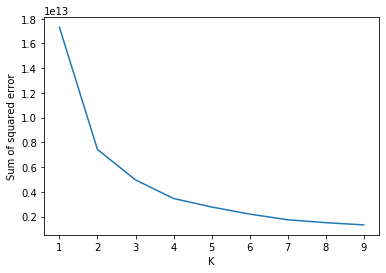

In [122]:
# Importer la classe kmeans
from sklearn.cluster import KMeans
#Utilise la méthode elbow pour connaitre la meilleur valeur de k
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_propre.iloc[:,1:])
    sse.append(km.inertia_)
    print (km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [123]:
#Appliquer la méthode Kmeans pour k=2
Model1 = KMeans(n_clusters=2)
Model1.fit(data_propre.iloc[:,1:])
Model1.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [124]:
#faire identifier la classe de chaque valeur en utilisant crosstab
pd.crosstab(data_bad.iloc[:,0],Model1.labels_)

col_0,0,1
BAD,,
0,2571,493
1,252,48


## CAH

In [125]:
#Importer la classe CAH
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
# Faire la liaison entre tous les données en utilisant la fonction linkage()
Z= linkage(data_propre.iloc[:,1:],method='ward',metric='euclidean')

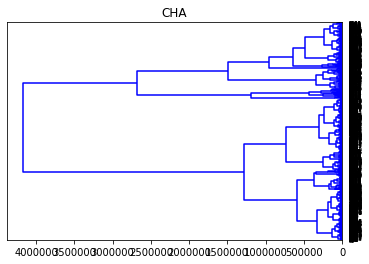

In [126]:
plt.title("CHA") 
#Afficher la liaison obtenu avec dendogramme
dendrogram(Z,labels=data_model.index,orientation='left',color_threshold=0) 
plt.show()

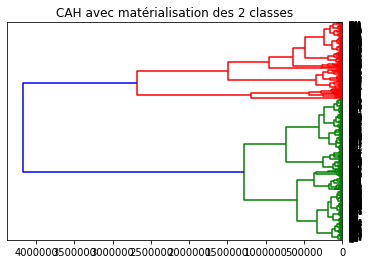

In [127]:
# Choisir un threshhold qui permet de diviser les données en deux classes
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=data_model.index,orientation='left',color_threshold=4000000
          ) 
plt.show()

In [128]:
#Appliquer la ségmentation en utilisant fcluster
clusters = fcluster(Z,criterion='distance', t=4000000)

In [129]:
#faire identifier la classe de chaque valeur en utilisant crosstab
pd.crosstab(data_bad.iloc[:,0],clusters)

col_0,1,2
BAD,,
0,1988,1076
1,210,90


## DBSCAN

In [130]:
# Importer la classe DBSCAN,metric
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 

  
# Appliquer DBSCAN 
db = DBSCAN(eps=0.3, min_samples=10).fit(data_propre.iloc[:,1:]) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 
  
# Identifier le nombre de clusters   
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [131]:
#Faire l'échantillonnage des données
dbscan_data_scaler = StandardScaler().fit(data_model.values)
dbscan_data=dbscan_data_scaler.transform(data_model.values)
dbscan_data

array([[-1.6051791 , -1.22772765, -0.25343359, -0.3444486 ,  0.37460073],
       [-1.59598268, -1.17812979, -0.25343359, -0.3444486 ,  0.34583182],
       [-1.55000061,  0.24582581, -0.25343359, -0.3444486 , -0.32036154],
       ...,
       [ 6.44168445, -0.26639908, -0.25343359, -0.3444486 ,  0.17875445],
       [ 6.49686294, -0.28582522, -0.25343359, -0.3444486 ,  0.02583963],
       [ 6.50605935, -0.33931561, -0.25343359, -0.3444486 ,  0.0548497 ]])

In [132]:
#Appliquer DBSCAN au données échantilooné
DBSCANModel = DBSCAN(metric='euclidean',eps=0.25,min_samples=10,algorithm='auto').fit(dbscan_data)#it can be ball_tree, kd_tree, brute
DBSCANModel

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [133]:
data_model

,LOAN,VALUE,DEROG,DELINQ,DEBTINC
0,-1.605,-1.228,-0.253,-0.344,0.375
1,-1.596,-1.178,-0.253,-0.344,0.346
2,-1.550,0.246,-0.253,-0.344,-0.320
3,-1.541,-1.097,-0.253,-0.344,0.519
4,-1.541,0.177,-0.253,-0.344,-0.560
5,-1.495,0.091,-0.253,-0.344,-0.514
6,-1.495,0.241,-0.253,-0.344,-0.531
7,-1.495,-0.722,4.924,-0.344,0.261
8,-1.495,-0.669,-0.253,-0.344,1.896
9,-1.486,0.260,-0.253,-0.344,-0.261
